In [2]:
import json
import pandas as pd

In [3]:
def get_target_features(all_features, white_list_features=[]):
    target_features = white_list_features
    if not white_list_features:
        target_features = all_features
    return target_features


def show_stats(data, white_list_features=[]):
    all_features = [k for k in data]
    target_features = get_target_features(all_features, white_list_features)

    for feature in target_features:
        print(f"\n{feature}\n")
        feature_metrics = data[feature]
        df = pd.DataFrame.from_dict(feature_metrics)
        display(df)


def prepare_histogram_data(data, white_list_features=[]):
    all_features = [k for k in data]
    target_features = get_target_features(all_features, white_list_features)

    feature_hists = {}
    feature_edges = {}

    for feature in target_features:
        xs = data[feature]['histogram']
        hists = {}
        feature_edges[feature] = []
        for i, ds in enumerate(xs):
            ds_hist = xs[ds]
            ds_bucket_counts = []
            for bucket in ds_hist:
                if i == 0:
                    feature_edges[feature].append(bucket[0])
                ds_bucket_counts.append(bucket[2])
                hists[ds] = ds_bucket_counts
        feature_hists[feature] = hists

    return feature_hists, feature_edges


def show_histograms(data, white_list_features=[]):
    (hists, edges) = prepare_histogram_data(data)

    all_features = [k for k in edges]
    target_features = get_target_features(all_features, white_list_features)

    for feature in target_features:
        hist_data = hists[feature]
        index = edges[feature]
        df = pd.DataFrame(hist_data, index=index)
        axes = df.plot.line(rot=40)
        axes = df.plot.line(rot=40, subplots=True)


In [4]:
with open('adults_stats.json', 'r') as f:
    data = json.load(f)

In [7]:
show_stats(data, ['Age','fnlwgt'])


Age



,count,mean,sum,min,max,var,stddev,histogram
site-2-train,13025,38.749098,504707,0,120,63.714487,13.825030,"[[0.0, 12.0, 0], [12.0, 24.0, 1992], [24.0, 36..."
site-2-test,3256,38.840909,126466,0,120,64.832371,13.947296,"[[0.0, 12.0, 0], [12.0, 24.0, 462], [24.0, 36...."
site-1-train,26049,38.554110,1004296,0,120,124.389221,13.659589,"[[0.0, 12.0, 0], [12.0, 24.0, 3849], [24.0, 36..."
site-1-test,6512,38.691800,251961,0,120,122.650407,13.564017,"[[0.0, 12.0, 0], [12.0, 24.0, 923], [24.0, 36...."
Global-train,39074,38.619107,1509003,0,120,188.103708,13.715091,"[[0.0, 12.0, 0], [12.0, 24.0, 3849], [24.0, 36..."
Global-test,9768,38.741503,378427,0,120,187.482778,13.692435,"[[0.0, 12.0, 0], [12.0, 24.0, 923], [24.0, 36...."



fnlwgt



,count,mean,sum,min,max,var,stddev,histogram
site-2-train,13025,188377.939271,2453622659,11079.989132,1.875178e+06,3.725848e+09,105717.803860,"[[10260.700756030861, 103506.58176930534, 2533..."
site-2-test,3256,193666.956695,630579611,11085.377858,1.101833e+06,3.722334e+09,105613.629556,"[[10260.700756030861, 103506.58176930534, 572]..."
site-1-train,26049,190260.754501,4956102394,10260.700756,1.759683e+06,7.489986e+09,105994.683154,"[[10260.700756030861, 103506.58176930534, 4855..."
site-1-test,6512,187848.740479,1223270998,10445.964792,1.095823e+06,7.176471e+09,103737.629675,"[[10260.700756030861, 103506.58176930534, 1280..."
Global-train,39074,189633.133362,7409725053,10260.700756,1.875178e+06,1.121583e+10,105904.834766,"[[10260.700756030861, 103506.58176930534, 4855..."
Global-test,9768,189788.145885,1853850609,10260.700756,1.875178e+06,1.089880e+10,104397.341204,"[[10260.700756030861, 103506.58176930534, 1280..."


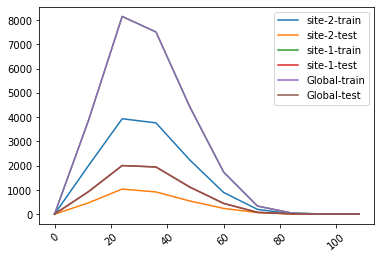

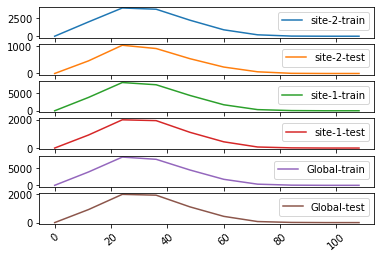

In [8]:
show_histograms(data, ['Age'])